In [2]:
import pandas as pd
from scipy.stats import spearmanr, kendalltau, linregress
import matplotlib.pyplot as plt


In [3]:
import sys
sys.path.append("/Users/emiliekibsgaard/Desktop/MetaprivBIDS-Assessment")  
import metaprivBIDS_stat as ST
from metapriv_stat import plot_calc
from metapriv_stat import rst_outlier_case2

In [4]:
MID = 'https://s3.amazonaws.com/openneuro.org/ds000224/participants.tsv?versionId=RaGnxcCJR.z4fAw6Ihy9D683s7p4deYL'
MID = pd.read_csv(MID, sep='\t')
MID.to_csv('data_ds000224/midnight_dataset_ds003097.csv', sep=',', index=False)

na_percentage = MID.isna().mean() * 100
na_percentage = na_percentage[na_percentage >= 10].sort_values(ascending=False)
na_percentage

Series([], dtype: float64)

In [5]:
suda = pd.read_csv('data_ds000224/suda_ds000224.csv', sep=',')
pif = pd.read_csv('data_ds000224/pif_ds000224.csv', sep=',',index_col='Unnamed: 0').sort_index()

In [6]:
# Spearman Rank Correlation
correlation_spearman, _ = spearmanr(suda['score'], pif['RIG'])
print(f"Spearman Rank Correlation between suda & pif: {correlation_spearman:.2f}")  
    
    
# Kendall's Tau Correlation
tau, p_value = kendalltau(suda['score'], pif['RIG'])
print(f"Kendall's Tau between suda & pif: {tau:.2f}, p-value: {p_value:.4f}")

Spearman Rank Correlation between suda & pif: 0.69
Kendall's Tau between suda & pif: 0.63, p-value: 0.0245


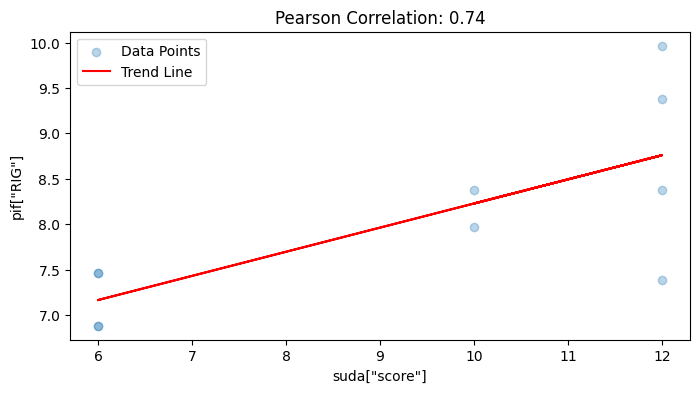

In [7]:
correlation_pearson = suda['score'].corr(pif['RIG'])
    
fig, ax = plt.subplots(figsize=(8, 4))
ax.scatter(suda['score'], pif['RIG'], alpha=0.3, label='Data Points')
    

slope, intercept, _, _, _ = linregress(suda['score'], pif['RIG'])
ax.plot(suda['score'], slope * suda['score'] + intercept, color='red', label='Trend Line')
    
ax.set_title(f'Pearson Correlation: {correlation_pearson:.2f}')
ax.set_xlabel('suda["score"]')
ax.set_ylabel('pif["RIG"]')
ax.grid(False)
ax.legend()
    
plt.show()    

In [12]:
class_outliers, madn, mad, outlier_indices, above_outlier_indices = ST.rst_outlier_case2(suda, 'dis-score')
print(len(above_outlier_indices))
class_outliers, madn, mad, outlier_indices, above_outlier_indices = rst_outlier_case2(pif, 'RIG')
print(len(above_outlier_indices))

0
1


In [13]:
MID.loc[1]

participant_id      sub-MSC02
gender                      M
age                        34
education_degree    Doctorate
education_years          28.0
Name: 1, dtype: object

In [14]:
MID

,participant_id,gender,age,education_degree,education_years
0,sub-MSC01,M,34,Doctorate,22.0
1,sub-MSC02,M,34,Doctorate,28.0
2,sub-MSC03,F,29,Masters,18.0
3,sub-MSC04,F,28,Bachelors,22.0
4,sub-MSC05,M,27,Bachelors,20.0
5,sub-MSC06,F,24,Bachelors,17.5
6,sub-MSC07,F,31,Masters,20.0
7,sub-MSC08,F,27,Professional,21.0
8,sub-MSC09,M,26,Professional,19.0
9,sub-MSC10,M,31,Professional,19.0
